In [1]:
%matplotlib inline

%run -i ../libs/import_libs.py

In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options  

In [5]:
from selenium.webdriver.chrome.options import Options

options = Options()
options.headless = True
path = '/home/tarik/misc/chromedriver'
driver = webdriver.Chrome("./chromedriver",options=options)

driver.get("http://covidly.com/summary")

In [6]:
# https://github.com/CSSEGISandData/COVID-19
mapper_dict = {'Bosnia and Herz.': 'Bosnia and Herzegovina',
 ' Czechia': 'Czech Republic',
 'Dominican Rep.': 'Dominican Republic',
 'Faroe Is.': 'Faroe Islands',
 'blah': 'French Guiana',
#  'China': 'Mainland China',
 'blah3': 'Martinique',
 'blah2': 'Others',
 'St. Barthélemy': 'Saint Barthelemy',
#  'United Kingdom': 'UK',
 'United States': 'US',
 'UAE': 'United Arab Emirates',
 'Vatican': 'Vatican City'}

# oecd_list = ['Luxembourg', 'Ireland', 'Switzerland', 'Norway', 'US',
#        'Iceland', 'Netherlands', 'Austria', 'Denmark', 'Australia',
#        'Germany', 'Sweden', 'Belgium', 'Finland', 'Canada',
#        'UK', 'France', 'Japan', 'Italy', 'New Zealand',
#        'South Korea', 'Spain', 'Israel', 'Czech Republic',
#        'Slovenia', 'Estonia', 'Slovakia', 'Portugal', 'Poland', 'Hungary',
#        'Greece', 'Turkey', 'Chile', 'Mexico']
oecd_list = ['Luxembourg', 'Ireland', 'Switzerland', 'Norway', 'US',
       'Iceland', 'Netherlands', 'Austria', 'Denmark', 'Australia',
       'Germany', 'Sweden', 'Belgium', 'Finland', 'Canada',
       'United Kingdom', 'France', 'Japan', 'Italy', 'New Zealand',
       'South Korea', 'Spain', 'Israel',
       'Slovenia', 'Estonia', 'Slovakia', 'Portugal', 'Poland', 'Hungary',
       'Greece', 'Chile', 'Mexico']

mapper_jhu = {
# 'Channel Islands',
#  'Czech Republic',
#  'French Guiana',
#  'Holy See',
 'Hong Kong SAR': 'Hong Kong',
 'Iran (Islamic Republic of)': 'Iran',
 'Macao SAR': 'Macau',
#  'Martinique',
#  'Others',
 'Korea, South': 'South Korea',
 'Republic of Moldova': 'Moldova',
 'Russian Federation': 'Russia',
#  'Saint Martin',
#  'Taipei and environs',
 'Viet Nam': 'Vietnam',
 'occupied Palestinian territory': 'Palestine'}


In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
df = df.drop(["Lat", "Long"], axis=1).copy()

for c in mapper_jhu:
    df.loc[df["Country/Region"] == c, "Country/Region"] = mapper_jhu[c]
df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
0,NaN,Thailand,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212
1,NaN,Japan,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889
2,NaN,Singapore,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313
3,NaN,Nepal,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790


In [8]:
dfs = pd.read_html(driver.page_source)[1].rename(columns={'Cases  Total (#)': "latest_count", 
    'Cases / 1M  (#)': 'case_per_mil'})

dfs["Country"] = [mapper_dict[c] if c in mapper_dict.keys() else c for c in dfs.Country]
dfs.head()

,Country,HealthScore,latest_count,Cases New (#),Deaths Total (#),Deaths New (#),Recovered Total (#),Recovered New (#),Cases Per 1M,Deaths Per 1M,Unnamed: 10
0,China,9 Great,80984,NaN,3245.0,5.0,70420.0,735.0,58.7,2.4,NaN
1,Italy,3 Bad,41035,"+5,322",3405.0,427.0,4440.0,415.0,660.4,54.8,NaN
2,Iran,5 Bad,18407,"+1,046",1284.0,149.0,5979.0,429.0,224.4,15.7,NaN
3,Spain,2 Terrible,18077,"+3,308",831.0,193.0,1107.0,26.0,369.2,17.0,NaN
4,Germany,2 Terrible,15320,"+2,993",44.0,16.0,113.0,8.0,190.1,0.5,NaN


In [11]:
df2 = df[~df["Province/State"].isin(["Diamond Pricess", "Grand Princess"])].rename(columns={"Country/Region": "Country"})
country_df0 = df2.groupby("Country").sum()
country_df = pd.merge(country_df0, dfs[["Country", "latest_count"]], left_index=True, right_on='Country').set_index('Country')


td = (datetime.datetime.today() - datetime.timedelta(days=1)).strftime('%-m/%-d/%y')
country_df[td] = country_df[["latest_count", td]].max(axis=1)
country_df = country_df.drop(['latest_count'], axis=1).transpose()

country_df["OECD"] = country_df[oecd_list].sum(axis=1)
country_df.head()

Country,Afghanistan,Albania,Algeria,Andorra,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cambodia,Cameroon,Canada,Chile,China,Colombia,Costa Rica,Croatia,Cuba,Cyprus,Czechia,Denmark,Djibouti,Dominican Republic,Ecuador,Egypt,Estonia,Eswatini,Ethiopia,Finland,France,Gabon,Georgia,Germany,Ghana,Greece,Greenland,Guatemala,Guinea,Guyana,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kosovo,Kuwait,Kyrgyzstan,Latvia,Lebanon,Liberia,Liechtenstein,Lithuania,Luxembourg,Malaysia,Maldives,Malta,Martinique,Mauritania,Mauritius,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Namibia,Nepal,Netherlands,New Zealand,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Lucia,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Korea,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,OECD
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,4
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,2,0,3
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,2,0,0,0,0,0,0,0,5,0,0,0,0,2,0,0,0,0,0,0,2,0,8
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,2,0,0,0,0,0,0,0,7,0,0,0,0,2,0,0,0,0,0,0,2,0,9
1/26/20,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2075,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,3,0,0,0,0,0,0,0,8,0,0,0,0,5,0,0,0,0,0,0,2,0,20


In [12]:
country_df[["China", "OECD", "Bangladesh", "Philippines"]].tail()

Country,China,OECD,Bangladesh,Philippines
3/14/20,80977,58044,3,111
3/15/20,81003,67384,5,140
3/16/20,81033,79509,8,142
3/17/20,81058,92584,10,187
3/18/20,81102,133172,18,217


Text(0.5, 0, 'Timeline')

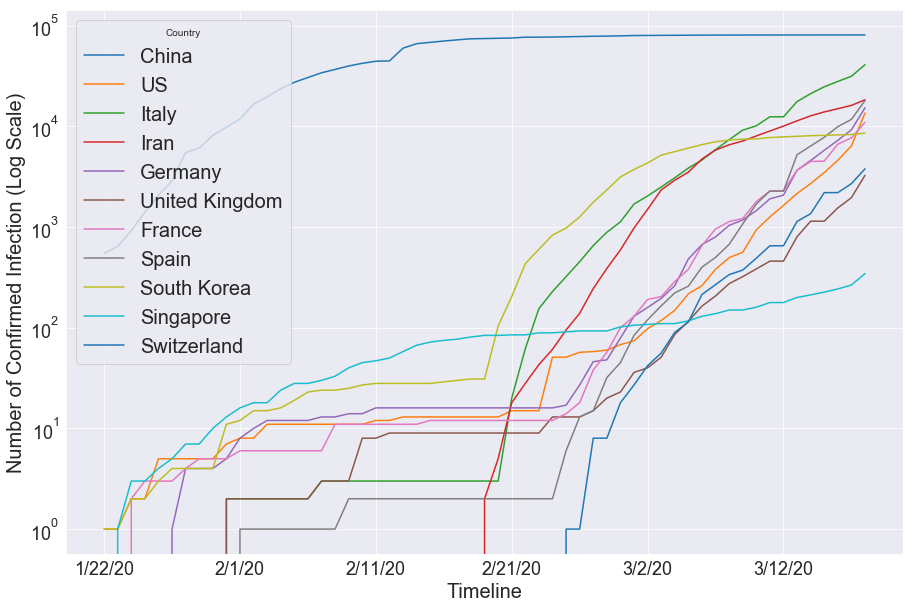

In [13]:
china_df = country_df[["China", "US", "Italy", "Iran", "Germany", 'United Kingdom', "France", 
                       "Spain",  "South Korea", "Singapore", "Switzerland"]]

# china_df = country_df[["Mainland China", "US", "OECD"]]
china_df.head()

china_df.plot()
plt.ticklabel_format(style='plain', axis='y')
plt.yscale('log')
plt.ylabel("Number of Confirmed Infection (Log Scale)")
plt.xlabel("Timeline")


Text(0.5, 1.0, 'Total Number of Infected')

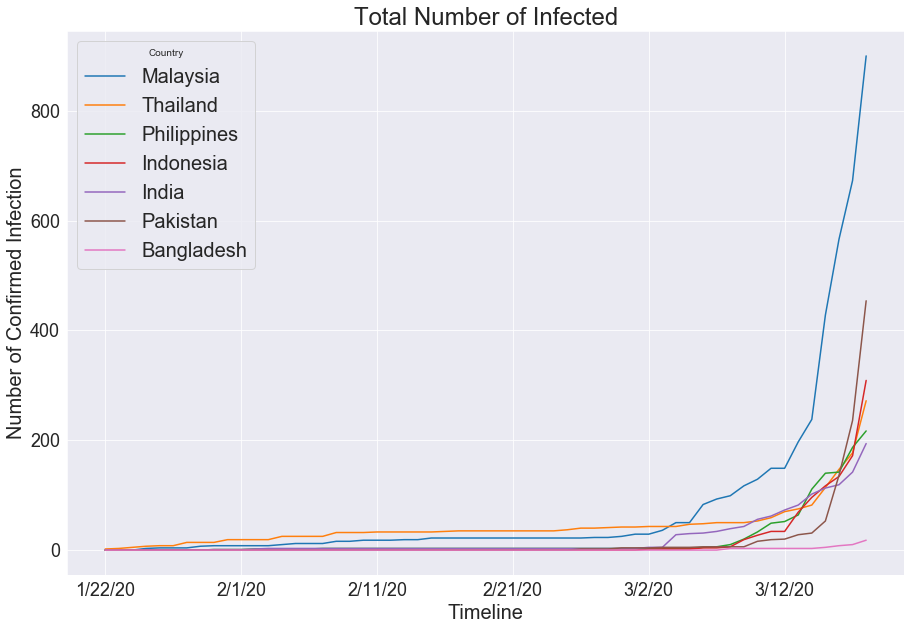

In [15]:
china_df = country_df[["Malaysia", "Thailand", "Philippines", "Indonesia", "India", "Pakistan", "Bangladesh"]]

china_df.plot()
plt.ticklabel_format(style='plain', axis='y')
# plt.yscale('log')
plt.ylabel("Number of Confirmed Infection")
plt.xlabel("Timeline") 
plt.title("Total Number of Infected")

Text(0.5, 1.0, 'Total Number of Infected')

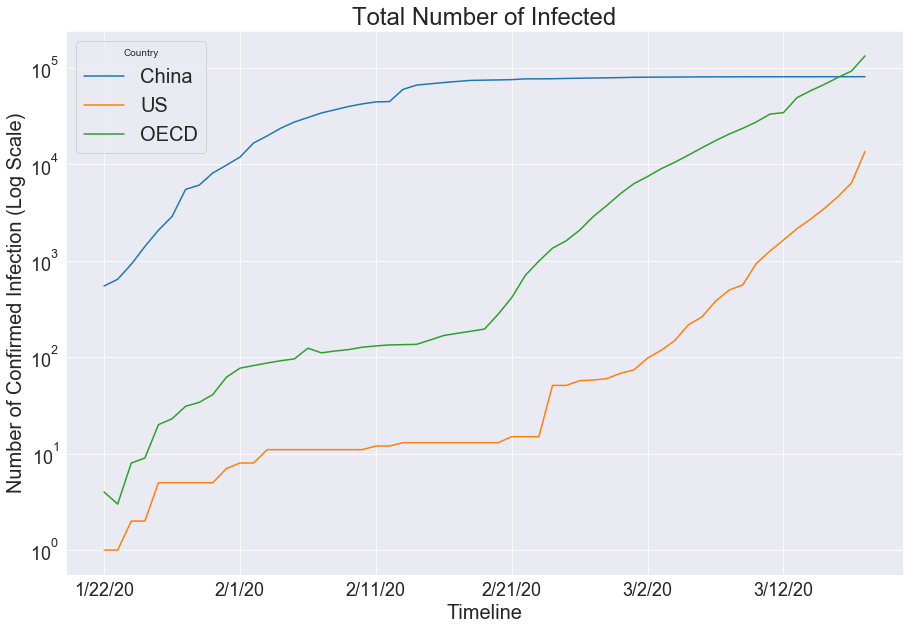

In [16]:
china_df = country_df[["China", "US", "OECD"]]

china_df.plot()
plt.ticklabel_format(style='plain', axis='y')
plt.yscale('log')
plt.ylabel("Number of Confirmed Infection (Log Scale)")
plt.xlabel("Timeline")
plt.title("Total Number of Infected")

Text(0.5, 1.0, 'Comparative Analysis of the Number of Infected (with offset)')

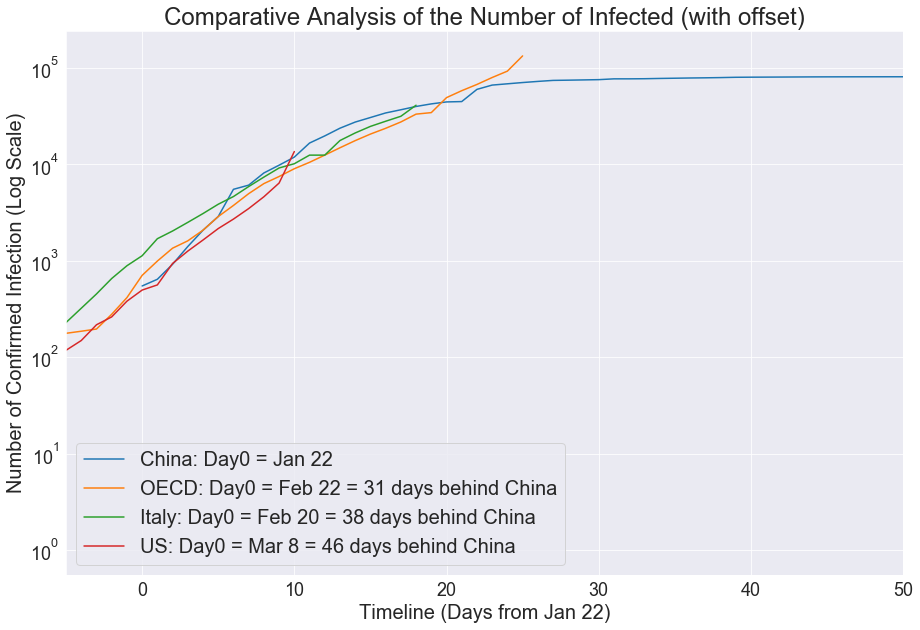

In [17]:
china_df = country_df[["China", "US", "OECD", "Italy"]].copy()
china_df["day_no"] = range(len(china_df))
# china_df.plot()

plt.plot(china_df.day_no , china_df["China"], label="China: Day0 = Jan 22")
plt.plot(china_df.day_no - 31 , china_df["OECD"], label="OECD: Day0 = Feb 22 = 31 days behind China")
plt.plot(china_df.day_no - 38 , china_df["Italy"], label="Italy: Day0 = Feb 20 = 38 days behind China")
plt.plot(china_df.day_no - 46 , china_df["US"], label="US: Day0 = Mar 8 = 46 days behind China")
plt.xlim(-5,50)
# ["Mainland China", "US", "OECD"]
plt.ticklabel_format(style='plain', axis='y')
plt.yscale('log')
plt.ylabel("Number of Confirmed Infection (Log Scale)")
plt.xlabel("Timeline (Days from Jan 22)")
plt.legend()
plt.title("Comparative Analysis of the Number of Infected (with offset)")

In [261]:
from sklearn import linear_model
from scipy.special import expit
from sklearn import preprocessing

In [262]:
clf = linear_model.LogisticRegression(C=1e5,max_iter=1000)

In [114]:
c = "South Korea"
china_data = country_df[[c]].copy()
china_data.head()

Country,South Korea
1/22/20,1
1/23/20,1
1/24/20,2
1/25/20,2
1/26/20,3


In [115]:
china_data["num_days"] = np.arange(len(china_data))
china_data.head()

Country,South Korea,num_days
1/22/20,1,0
1/23/20,1,1
1/24/20,2,2
1/25/20,2,3
1/26/20,3,4


In [118]:
X, y = china_data[["num_days"]].values, china_data[c].values
X1 = preprocessing.scale(X)
y1 = y

In [119]:
clf.fit(X1, y1)

/Users/tarik/.local/share/virtualenvs/alakazam-hdvw4kJ2/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [120]:
X1,y1

(array([[-1.6955825 ],
        [-1.62186152],
        [-1.54814054],
        [-1.47441956],
        [-1.40069858],
        [-1.32697761],
        [-1.25325663],
        [-1.17953565],
        [-1.10581467],
        [-1.03209369],
        [-0.95837272],
        [-0.88465174],
        [-0.81093076],
        [-0.73720978],
        [-0.6634888 ],
        [-0.58976782],
        [-0.51604685],
        [-0.44232587],
        [-0.36860489],
        [-0.29488391],
        [-0.22116293],
        [-0.14744196],
        [-0.07372098],
        [ 0.        ],
        [ 0.07372098],
        [ 0.14744196],
        [ 0.22116293],
        [ 0.29488391],
        [ 0.36860489],
        [ 0.44232587],
        [ 0.51604685],
        [ 0.58976782],
        [ 0.6634888 ],
        [ 0.73720978],
        [ 0.81093076],
        [ 0.88465174],
        [ 0.95837272],
        [ 1.03209369],
        [ 1.10581467],
        [ 1.17953565],
        [ 1.25325663],
        [ 1.32697761],
        [ 1.40069858],
        [ 1

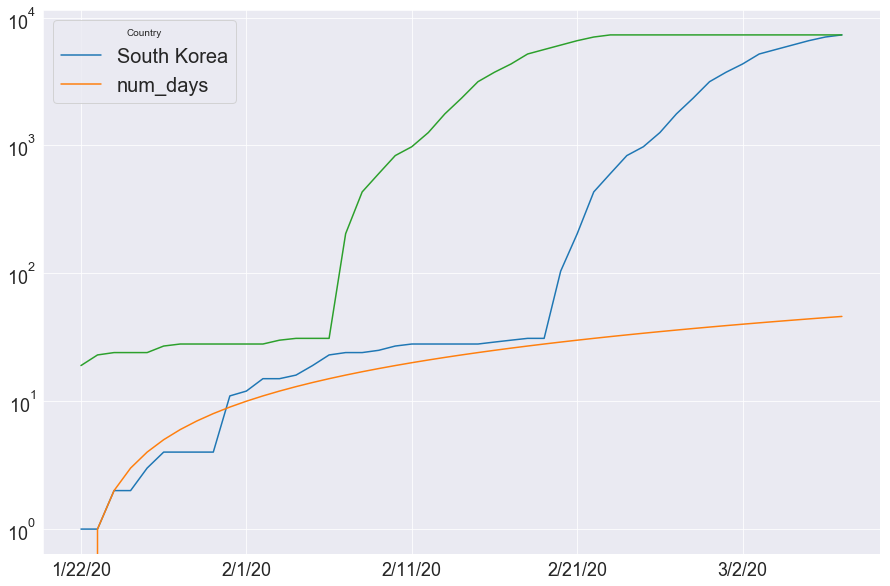

In [125]:
china_data.plot()
plt.plot(clf.predict(X1 + 1))
plt.yscale('log')

In [124]:
clf.predict(X1)

array([   1,    1,    2,    2,    3,    4,    4,    4,    4,   11,   12,
         15,   15,   16,   19,   23,   24,   24,   25,   27,   28,   28,
         28,   28,   28,   29,   30,   31,   31,  104,  204,  433,  602,
        833,  977, 1261, 1766, 2337, 3150, 3736, 4335, 5186, 5621, 6088,
       6593, 7041, 7314])

In [153]:
all_country_df = country_df.drop(["Mainland China"], axis=1).sum(axis=1)
all_country_df = pd.DataFrame(all_country_df, columns=["Rest of the World"])

In [154]:
all_country_df.head()

,Rest of the World
1/22/20,8
1/23/20,14
1/24/20,25
1/25/20,35
1/26/20,56


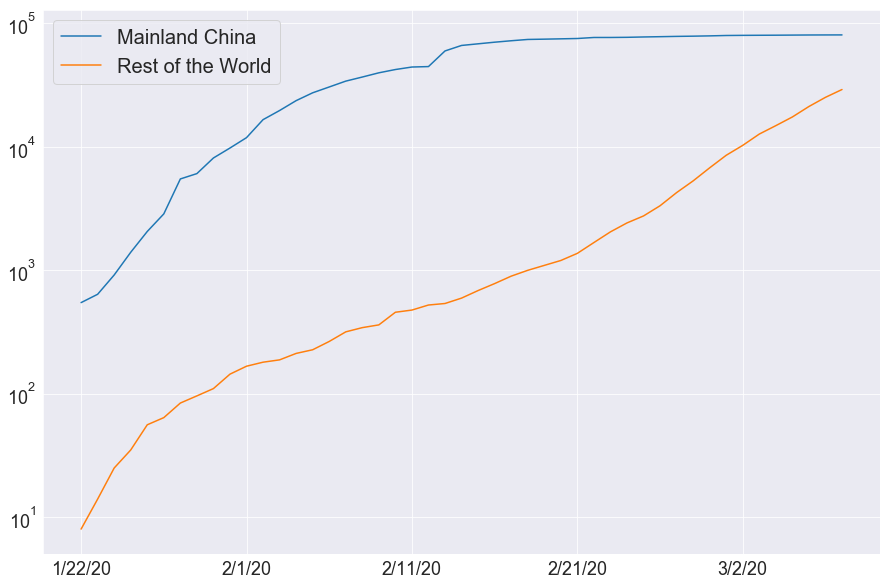

In [168]:
# all_country_df.plot()
pd.merge(country_df[["Mainland China"]], all_country_df,left_index=True, right_index=True).plot()
plt.yscale('log')

In [105]:
country_df[["US"]]

Country,US
1/22/20,1
1/23/20,1
1/24/20,2
1/25/20,2
1/26/20,5
1/27/20,5
1/28/20,5
1/29/20,5
1/30/20,5
1/31/20,7


In [8]:
dfs[dfs.Country == "United States"]

,Country,HealthScore,Confirmed Total (#),Confirmed New (#),Deaths Total (#),Deaths New (#),Recovered Total (#),Recovered New (#),Cases / 1M (#)
7,United States,25 Terrible,974,390.0,30.0,8.0,8.0,NaN,3.0


In [16]:
merged_df= pd.merge(country_df0, dfs, left_index=True, right_on="Country")

In [17]:
merged_df

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,Country,HealthScore,Cases Total (#),Cases New (#),Deaths Total (#),Deaths New (#),Recovered Total (#),Recovered New (#),case_per_mil,Unnamed: 9
84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,Afghanistan,NaN,7,NaN,NaN,NaN,NaN,NaN,0.2,NaN
55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,Albania,NaN,23,+11,1.0,NaN,NaN,NaN,7.5,NaN
53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,Algeria,NaN,24,+4,1.0,1.0,8.0,+8,0.6,NaN
107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,Andorra,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,8,12,12,17,19,Argentina,NaN,21,+2,1.0,NaN,NaN,NaN,0.5,NaN
85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,Armenia,NaN,6,+5,NaN,NaN,NaN,NaN,2.0,NaN
22,0,0,0,0,4,5,5,6,9,9,12,12,12,13,13,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,19,22,22,22,22,22,23,23,25,27,30,39,52,55,60,63,76,91,107,128,Australia,6 Stable,156,+28,3.0,NaN,26.0,+5,6.7,NaN
17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,3,3,9,14,18,21,29,41,55,79,104,131,182,246,Austria,4 Bad,361,+115,1.0,1.0,4.0,NaN,41.2,NaN
72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,6,6,9,9,9,11,11,Azerbaijan,NaN,15,+4,1.0,1.0,3.0,NaN,1.5,NaN
19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,23,33,33,36,41,47,49,49,52,55,60,85,85,95,110,195,Bahrain,4 Bad,195,NaN,NaN,NaN,35.0,NaN,138.2,NaN


In [18]:
set(country_df0.index) - set(merged_df.Country) 

{'China',
 'Congo (Kinshasa)',
 "Cote d'Ivoire",
 'Cruise Ship',
 'French Guiana',
 'Holy See',
 'Korea, South',
 'Martinique',
 'Reunion',
 'Taiwan*',
 'United Kingdom'}

In [147]:
oecd_df = pd.read_html("https://en.wikipedia.org/wiki/List_of_OECD_countries_by_GDP_per_capita")[1]

In [150]:
oecd_df.Country.values

array(['Luxembourg', 'Ireland', 'Switzerland', 'Norway', 'United States',
       'Iceland', 'Netherlands', 'Austria', 'Denmark', 'Australia',
       'Germany', 'Sweden', 'Belgium', 'Finland', 'Canada',
       'United Kingdom', 'France', 'Japan', 'Italy', 'New Zealand',
       'OECD', 'South Korea', 'Spain', 'Israel', 'Czech Republic',
       'Slovenia', 'Estonia', 'Slovakia', 'Portugal', 'Poland', 'Hungary',
       'Greece', 'Turkey', 'Chile', 'Mexico'], dtype=object)

In [43]:
# df2[df2.Country == "US"]

,Province/State,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
100,Washington,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,267,366
101,New York,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,173,220
102,California,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,177
103,Massachusetts,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,92,95
104,Diamond Princess,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,36,42,42,44,44,44,45,45,45,45,45,45,45,45,46,46
105,Grand Princess,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,21,21,21,21
106,Georgia,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,23
107,Colorado,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,34
108,Florida,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,28
109,New Jersey,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,23
